<a href="https://colab.research.google.com/github/kumar-shivang/Machine-Learning/blob/main/Week_2_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week-2

**Note to Learners**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

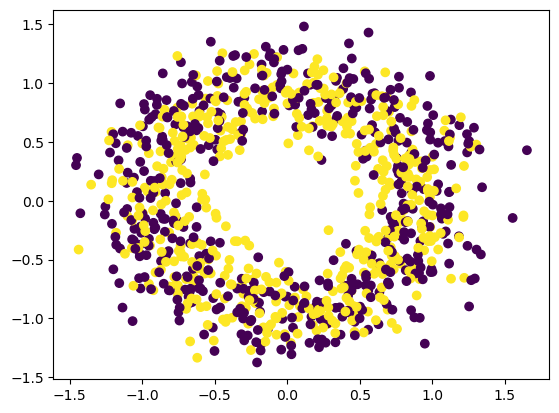

In [3]:
# Enter your solution here
#plot the data using matplotlib
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()




## Problem 2
How many samples are there in the dataset?


In [4]:
#number of samples in the dataset
n_samples = X.shape[0]
print(n_samples, "samples")



1000 samples


## Problem 3
How many features are there in the dataset?

In [5]:
#number of features in the dataset
n_features = X.shape[1]
print(n_features, "features")


2 features


## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$. 

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [16]:
# Find the polynomial kernal with degree 2 and centerlize the kernel matrix
K = (X.dot(X.T)+1)**2 #dot product of X and X transpose


sum1=0
for i in range(n_samples):
    for j in range(n_samples):
        sum1 += K[i,j]**2
print(sum1**0.5/n_samples)
K4 = K 


2.096195646589976


## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$. 

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [15]:
# Fine the gaussian kernel with sigma = 2 and centerlize the kernel matrix
K = np.empty((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i,j] = np.exp(-np.linalg.norm(X[i]-X[j])**2/(2*2**2))

sum1=0
for i in range(n_samples):
    for j in range(n_samples):
        sum1 += K[i,j]**2
print(sum1**0.5/n_samples)



0.8079400085319918


## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 4. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [17]:
# center the K4 kernel matrix
KC = K4- np.mean(K4, axis=0) - np.mean(K4, axis=1)[:, np.newaxis] + np.mean(K4)

sum1 = 0
for i in range(n_samples):
    for j in range(n_samples):
        sum1 += KC[i,j]**2
print(sum1**0.5/n_samples)


1.4517985176976662


## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

In [21]:
# Find the eigen values and eigen vectors of the kernel matrix
eig_vals, eig_vecs = np.linalg.eig(KC)
eig_vals = np.real(eig_vals)
eig_vecs = np.real(eig_vecs)

PC1, PC2 = eig_vecs[:,0], eig_vecs[:,1]

print(np.sum(PC1)+np.sum(PC2))


1.4155343563970746e-15
